<a href="https://colab.research.google.com/github/Dominic2681998/Data_Science/blob/main/CNN_USING_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:

print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      

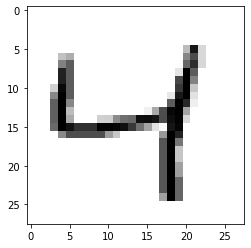

In [ ]:
plt.imshow(x_train[2],cmap='binary')
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
cnnModel_Mnist=keras.models.Sequential()
cnnModel_Mnist.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=x_train.shape[1:]))
cnnModel_Mnist.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
cnnModel_Mnist.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_Mnist.add(keras.layers.Dropout(0.25))
cnnModel_Mnist.add(keras.layers.Flatten())
cnnModel_Mnist.add(keras.layers.Dense(128,activation='relu'))
cnnModel_Mnist.add(keras.layers.Dropout(0.25))
cnnModel_Mnist.add(keras.layers.Dense(10,activation='softmax'))
cnnModel_Mnist.summary()

In [ ]:
cnnModel_Mnist.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnnModel_Mnist.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_accuracy=cnnModel_Mnist.evaluate(x_test,y_test)
print(test_loss,test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.0429 - accuracy: 0.9853
0.04286545515060425 0.9853000044822693


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt


TypeError: ignored

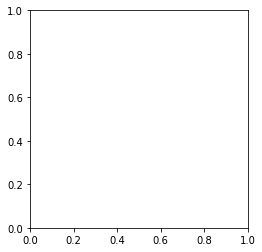

In [ ]:
img=load_image("/content/sample_image.png",grayscale=True,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,28*28)
img=img.astype('float32')/255.0
print(cnnModel_Mnist.predict(img))